Você pode adquirir versões impressas e de e-book do *Think Python 3e* (em inglês) em
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) e
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

Uma versão em língua portuguesa da 3ª edição foi publicada pela editora [Novatec](https://novatec.com.br/livros/pense-em-python-3ed/).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Valores Devolvidos

Em capítulos anteriores, usamos funções internas -- como `abs` e `round` -- e funções no módulo math -- como `sqrt` e `pow`.
Quando você chama uma dessas funções, ela devolve um valor que você pode atribuir a uma variável ou usar como parte de uma expressão.

As funções que escrevemos até agora são diferentes.
Algumas usam a função `print` para exibir valores, e algumas usam funções turtle para desenhar figuras.
Mas elas não devolvem valores que atribuímos a variáveis ​​ou usamos em expressões.

Neste capítulo, veremos como escrever funções que devolvem valores.

## Algumas funções devolvem valores

Quando você chama uma função como `math.sqrt`, o resultado é chamado de **valor devolvido**.
Se a chamada da função aparecer no final de uma célula, o Jupyter exibe o valor devolvido imediatamente:

In [ ]:
import math

math.sqrt(42 / math.pi)

3.656366395715726

Se você atribuir o valor devolvido a uma variável, ele não será exibido:

In [ ]:
radius = math.sqrt(42 / math.pi)

Mas você pode exibi-lo mais tarde:

In [ ]:
radius

3.656366395715726

Ou você pode usar o valor devolvido como parte de uma expressão:

In [ ]:
radius + math.sqrt(42 / math.pi)

7.312732791431452

Aqui está um exemplo de uma função que devolve um valor:

In [ ]:
def circle_area(radius):
    area = math.pi * radius**2
    return area

`circle_area` recebe `radius` como parâmetro e calcula a área de um círculo com esse raio.

A última linha é uma declaração `return` que devolve o valor de `area`.

Se chamarmos a função assim, o Jupyter exibe o valor devolvido:

In [ ]:
circle_area(radius)

42.00000000000001

Podemos atribuir o valor devolvido a uma variável:

In [ ]:
a = circle_area(radius)

Ou usá-lo como parte de uma expressão:

In [ ]:
circle_area(radius) + 2 * circle_area(radius / 2)

63.000000000000014

Mais tarde, podemos exibir o valor da variável à qual atribuímos o resultado:

In [ ]:
a

42.00000000000001

Mas não conseguimos acessar `area`:

In [ ]:
%%expect NameError

area

NameError: name 'area' is not defined

`area` é uma variável local em uma função, então não podemos acessá-la de fora da função.

## E algumas têm `None`

Se uma função não tiver uma instrução `return`, ela devolverá `None`, que é um valor especial como `True` e `False`.
Por exemplo, aqui está a função `repeat` do Capítulo 3:

In [ ]:
def repeat(word, n):
    print(word * n)

Se a chamarmos assim, ela exibe o primeiro verso da música "Finlândia" do Monty Python:

In [ ]:
repeat('Finland, ', 3)

Finland, Finland, Finland, 


Esta função usa a função `print` para exibir uma *string*, mas não usa uma instrução `return` para devolver um valor.
Se atribuirmos o resultado a uma variável, ela exibe a *string* de qualquer maneira:

In [ ]:
result = repeat('Finland, ', 3)

Finland, Finland, Finland, 


E se exibirmos o valor da variável, não obteremos nada:

In [ ]:
result

`result` na verdade tem um valor, mas o Jupyter não o mostra.
No entanto, podemos exibi-lo assim:

In [ ]:
print(result)

None


O valor devolvido retorno de `repeat` é `None`.

Agora aqui está uma função similar a `repeat` exceto que tem um valor devolvido:

In [ ]:
def repeat_string(word, n):
    return word * n

Observe que podemos usar uma expressão em uma instrução `return`, não apenas uma variável.

Com esta versão, podemos atribuir o resultado a uma variável.
Quando a função é executada, ela não exibe nada:

In [ ]:
line = repeat_string('Spam, ', 4)

Mas depois podemos exibir o valor atribuído a `line`:

In [ ]:
line

'Spam, Spam, Spam, Spam, '

Uma função como essa é chamada de **função pura** porque ela não exibe nada nem tem qualquer outro efeito -- além de devolver um valor.

## Valores devolvidos e condicionais

Se o Python não fornecesse `abs`, poderíamos escrever assim:

In [ ]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

Se `x` for negativo, a primeira instrução `return` devolverá `-x` e a função terminará imediatamente.
Caso contrário, a segunda instrução `return` devolverá `x` e a função terminará.
Então esta função está correta.

No entanto, se você colocar instruções `return` em uma condicional, você tem que se certificar de que todo caminho possível através do programa atinja uma instrução `return`.
Por exemplo, aqui está uma versão incorreta de `absolute_value`:

In [ ]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

Veja o que acontece se chamarmos esta função com `0` como argumento:

In [ ]:
absolute_value_wrong(0)

Não obtemos nada! Aqui está o problema: quando `x` é `0`, nenhuma condição é verdadeira, e a função termina sem atingir uma instrução `return`, o que significa que o valor devolvido é `None`, então o Jupyter não exibe nada.

Como outro exemplo, aqui está uma versão de `absolute_value` com uma instrução `return` extra no final:

In [ ]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x

    return 'This is dead code'

Se `x` for negativo, a primeira instrução `return` é executada e a função termina.
Caso contrário, a segunda instrução `return` é executada e a função termina.
De qualquer forma, nunca chegamos à terceira instrução `return` -- então ela nunca pode ser executada.

Código que nunca pode ser executado é chamado de **código morto**.
Em geral, código morto não faz mal algum, mas geralmente indica um mal-entendido e pode ser confuso para alguém que tenta entender o programa.

## Desenvolvimento incremental

À medida que você escreve funções maiores, você pode acabar gastando mais
tempo depurando.
Para lidar com programas cada vez mais complexos, você pode tentar o **desenvolvimento incremental**, que é uma maneira de adicionar e testar apenas uma pequena quantidade de código por vez.

Por exemplo, suponha que você queira encontrar a distância entre dois pontos representados pelas coordenadas $(x_1, y_1)$ e $(x_2, y_2)$.
Pelo teorema de Pitágoras, a distância é:

$$\mathrm{distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

O primeiro passo é considerar como uma função `distance` deve se parecer em Python -- ou seja, quais são as entradas (parâmetros) e qual é a saída (valor devolvido)?

Para esta função, as entradas são as coordenadas dos pontos.
O valor devolvido é a distância.
Imediatamente você pode escrever um esboço da função:

In [ ]:
def distance(x1, y1, x2, y2):
    return 0.0

Esta versão ainda não calcula distâncias -- ela sempre devolve zero.
Mas é uma função completa com um valor devolvido, o que significa que você pode testá-la antes de torná-la mais complicada.

Para testar a nova função, nós a chamaremos com argumentos de exemplo:

In [ ]:
distance(1, 2, 4, 6)

0.0

Escolhi esses valores para que a distância horizontal seja `3` e a
distância vertical seja `4`.
Dessa forma, o resultado é `5`, a hipotenusa de um triângulo retângulo `3-4-5`. Ao testar uma função, é útil saber a resposta correta.

Neste ponto, confirmamos que a função é executada e devolve um valor, e podemos começar a adicionar código ao corpo.
Um bom próximo passo é encontrar as diferenças `x2 - x1` e `y2 - y1`.
Aqui está uma versão que armazena esses valores em variáveis ​​temporárias e os exibe:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    print('dx is', dx)
    print('dy is', dy)
    return 0.0

Se a função estiver funcionando, ela deve exibir `dx is 3` e `dy is 4`.
Se estiver, sabemos que a função está recebendo os argumentos corretos e
realizando o primeiro cálculo corretamente. Se não, há apenas algumas
linhas para verificar:

In [ ]:
distance(1, 2, 4, 6)

dx is 3
dy is 4


0.0

Tudo certo até aqui. Em seguida, calculamos a soma dos quadrados de `dx` e `dy`:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    print('dsquared is: ', dsquared)
    return 0.0

Novamente, podemos executar a função e verificar a saída, que deve ser `25`:

In [ ]:
distance(1, 2, 4, 6)

dsquared is:  25


0.0

Por fim, podemos usar `math.sqrt` para calcular a distância:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    print("result is", result)

E testá-la:

In [ ]:
distance(1, 2, 4, 6)

result is 5.0


O resultado está correto, mas esta versão da função exibe o resultado em vez de devolvê-lo, então o valor devolvido é `None`.

Podemos consertar isso substituindo a função `print` por uma instrução `return`:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    return result

Esta versão de `distance` é uma função pura.
Se a chamarmos assim, apenas o resultado será exibido:

In [ ]:
distance(1, 2, 4, 6)

5.0

E se atribuirmos o resultado a uma variável, nada será exibido:

In [ ]:
d = distance(1, 2, 4, 6)

As instruções `print` que escrevemos são úteis para depuração, mas uma vez que a função esteja funcionando, podemos removê-las.
Código como esse é chamado de **código de suporte** porque é útil para construir o programa, mas não faz parte do produto final.

Este exemplo demonstra o desenvolvimento incremental.
Os principais aspectos deste processo são:

1. Comece com um programa funcional, faça pequenas alterações e teste após cada alteração.

2. Use variáveis ​​para armazenar valores intermediários para que você possa exibi-los e verificá-los.

3. Uma vez que o programa esteja funcionando, remova o código de supoerte.

A qualquer momento, se houver um erro, você deve ter uma boa ideia de onde ele está.
O desenvolvimento incremental pode economizar muito tempo de depuração.

## Funções booleanas

As funções que devolvem os valores booleanos `True` e `False`, o que geralmente é conveniente para encapsular um teste complexo em uma função.
Por exemplo, `is_divisible` verifica se `x` é divisível por `y` sem resto:

In [ ]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

Veja como a usamos:

In [ ]:
is_divisible(6, 4)

False

In [ ]:
is_divisible(6, 3)

True

Dentro da função, o resultado do operador `==` é um booleano, então podemos escrever a função de forma mais concisa devolvendo-o diretamente:

In [ ]:
def is_divisible(x, y):
    return x % y == 0

Funções booleanas são frequentemente usadas em instruções condicionais:

In [ ]:
if is_divisible(6, 2):
    print('divisible')

divisible


Pode ser tentador escrever algo assim:

In [ ]:
if is_divisible(6, 2) == True:
    print('divisible')

divisible


Mas a comparação é desnecessária.

## Recursão com valores devolvidos

Agora que podemos escrever funções com valores devolvidos, podemos escrever funções recursivas com valores devolvidos e, com essa capacidade, passamos por um limite importante — o subconjunto do Python que temos agora é **Turing completo**, o que significa que podemos executar qualquer computação que possa ser descrita por um algoritmo.

Para demonstrar a recursão com valores devolvidos, avaliaremos algumas funções matemáticas definidas recursivamente.
Uma definição recursiva é semelhante a uma definição circular, no sentido de que a definição se refere à coisa que está sendo definida. Uma definição verdadeiramente circular não é muito útil:

> vorpal: Um adjetivo usado para descrever algo que é vorpal.

Se você visse essa definição no dicionário, poderia ficar irritado.
Por outro lado, se você procurasse a definição da função fatorial, denotada pelo símbolo $!$, poderia obter algo assim:

$$\begin{aligned}
0! &= 1 \\
n! &= n~(n-1)!
\end{aligned}$$

Esta definição diz que o fatorial de $0$ é $1$, e o fatorial de qualquer outro valor, $n$, é $n$ multiplicado pelo fatorial de $n-1$.

Se você pode escrever uma definição recursiva de algo, você pode escrever um programa em Python para avaliá-la.
Após um processo de desenvolvimento incremental, começaremos com uma função que recebe `n` como parâmetro e sempre devolve `0`:

In [ ]:
def factorial(n):
    return 0

Agora vamos adicionar a primeira parte da definição -- se o argumento for `0`, tudo o que precisamos fazer é devolver `1`:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return 0

Agora vamos preencher a segunda parte -- se `n` não for `0`, temos que fazer uma chamada recursiva para encontrar o fatorial de `n-1` e então multiplicar o resultado por `n`:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        return n * recurse

O fluxo de execução para este programa é semelhante ao fluxo de `countdown` no Capítulo 5.
Se chamarmos `factorial` com o valor `3`:

Como `3` não é `0`, pegamos o segundo ramo e calculamos o fatorial
de `n-1`\...

> Como `2` não é `0`, pegamos o segundo ramo e calculamos o
> fatorial de `n-1`\...
>
> > Como `1` não é `0`, pegamos o segundo ramo e calculamos o
> > fatorial de `n-1`\...
> >
> > > Como `0` é igual a `0`, pegamos o primeiro ramo e devolvemos `1` sem
> > > fazer mais chamadas recursivas.
> >
> > O valor devolvido, `1`, é multiplicado por `n`, que é `1`, e o
> > resultado é devolvido.
>
> O valor devolvido, `1`, é multiplicado por `n`, que é `2`, e o resultado
> é devolvido.

O valor devolvido `2` é multiplicado por `n`, que é `3`, e o resultado,
`6`, se torna o valor devolvido da chamada de função que iniciou todo o
processo.

A figura a seguir mostra o diagrama de pilha para esta sequência de chamadas de função:

In [ ]:
from diagram import Frame, Stack, make_binding

main = Frame([], name='__main__', loc='left')
frames = [main]

ns = 3, 2, 1
recurses = 2, 1, 1
results = 6, 2, 1

for n, recurse, result in zip(ns, recurses, results):
    binding1 = make_binding('n', n)
    binding2 = make_binding('recurse', recurse)
    frame = Frame([binding1, binding2],
                  name='factorial', value=result,
                  loc='left', dx=1.2)
    frames.append(frame)

binding1 = make_binding('n', 0)
frame = Frame([binding1], name='factorial', value=1,
              shim=1.2, loc='left', dx=1.4)
frames.append(frame)

stack = Stack(frames, dy=-0.45)

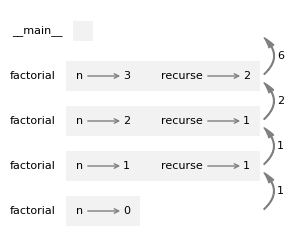

In [ ]:
from diagram import diagram, adjust

width, height, x, y = [2.74, 2.26, 0.73, 2.05]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

Os valores devolvidos são mostrados sendo passados ​​de volta para a pilha.
Em cada quadro, o valor devolvido é o produto de `n` e `recurse`.

No último quadro, a variável local `recurse` não existe porque a ramificação que a cria não é executada.

## Salto de fé

Seguir o fluxo de execução é uma maneira de ler programas, mas pode rapidamente se tornar maçante. Uma alternativa é o que eu chamo de "salto de fé". Quando você chega a uma chamada de função, em vez de seguir o fluxo de execução, você *assume* que a função funciona corretamente e devolve o resultado certo.

Na verdade, você já está praticando esse salto de fé quando usa funções internas.
Quando você chama `abs` ou `math.sqrt`, você não examina os corpos dessas funções -- você apenas assume que elas funcionam.

O mesmo é verdade quando você chama uma de suas próprias funções. Por exemplo, anteriormente escrevemos uma função chamada `is_divisible` que determina se um número é divisível por outro. Uma vez que nos convencemos de que essa função está correta, podemos usá-la sem olhar para o corpo novamente.

O mesmo é verdade para programas recursivos.
Quando você chega à chamada recursiva, em vez de seguir o fluxo de execução, você deve assumir que a chamada recursiva funciona e então se perguntar: "Supondo que eu possa calcular o fatorial de $n-1$, eu posso calcular o fatorial de $n$?"
A definição recursiva de fatorial implica que você pode, multiplicando por $n$.

Claro, é um pouco estranho assumir que a função funciona corretamente quando você não terminou de escrevê-la, mas é por isso que é chamado de salto de fé!

##Fibonacci

Depois de `factorial`, o exemplo mais comum de função recursiva é `fibonacci`, que tem a seguinte definição:

$$\begin{aligned}
\mathrm{fibonacci}(0) &= 0 \\
\mathrm{fibonacci}(1) &= 1 \\
\mathrm{fibonacci}(n) &= \mathrm{fibonacci}(n-1) + \mathrm{fibonacci}(n-2)
\end{aligned}$$

Traduzido para Python, fica assim:

In [ ]:
def fibonacci(n):
    if n == 0:
        return 0
    elif  n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

Se você tentar seguir o fluxo de execução aqui, mesmo para valores pequenos de $n$, sua cabeça explode.
Mas de acordo com o salto de fé, se você assumir que as duas chamadas recursivas funcionam corretamente, você pode ter certeza de que a última instrução `return` está correta.

Como um aparte, esta maneira de calcular números de Fibonacci é muito ineficiente.
No [Capítulo 10](https://colab.research.google.com/github/rodrigocarlson/PensePython3ed/blob/main/capitulos/chap10.ipynb) explicarei o porquê e sugerirei uma maneira de melhorá-la.

## Verificando tipos

O que acontece se chamarmos `factorial` e dermos `1.5` como argumento?

In [ ]:
%%expect RecursionError

factorial(1.5)

RecursionError: maximum recursion depth exceeded in comparison

Parece uma recursão infinita. Como pode ser? A função tem casos base quando `n == 1` ou `n == 0`.
Mas se `n` não for um inteiro, podemos *perder* o caso base e recursar para sempre.

Neste exemplo, o valor inicial de `n` é `1.5`.
Na primeira chamada recursiva, o valor de `n` é `0.5`.
Na próxima, é `-0.5`.
A partir daí, fica menor (mais negativo), mas nunca será `0`.

Para evitar recursão infinita, podemos usar a função interna `isinstance` para verificar o tipo do argumento.
Veja como verificamos se um valor é um inteiro:

In [ ]:
isinstance(3, int)

True

In [ ]:
isinstance(1.5, int)

False

Agora aqui está uma versão de `factorial` com verificação de erros:

In [ ]:
def factorial(n):
    if not isinstance(n, int):
        print('factorial is only defined for integers.')
        return None
    elif n < 0:
        print('factorial is not defined for negative numbers.')
        return None
    elif n == 0:
        return 1
    else:
        return n * factorial(n-1)

Primeiro, ela verifica se `n` é um inteiro.
Se não, ela exibe uma mensagem de erro e devolve `None`:

In [ ]:
factorial('crunchy frog')

factorial is only defined for integers.


Então ela verifica se `n` é negativo.
Se for, ela exibe uma mensagem de erro e devolve `None.`

In [ ]:
factorial(-2)

factorial is not defined for negative numbers.


Se passarmos por ambas as verificações, sabemos que `n` é um inteiro não negativo, então podemos ter certeza de que a recursão terminará.
Verificar os parâmetros de uma função para garantir que eles tenham os tipos e valores corretos é chamado de **validação de entrada**.

## Depuração

Dividir um programa grande em funções menores cria pontos de verificação naturais para depuração.
Se uma função não estiver funcionando, há três possibilidades a serem consideradas:

- Há algo errado com os argumentos que a função está recebendo -- ou seja, uma pré-condição foi violada.

- Há algo errado com a função -- ou seja, uma pós-condição foi violada.

- O chamador está fazendo algo errado com o valor devolvido.

Para descartar a primeira possibilidade, você pode adicionar uma instrução `print` no início da função que exibe os valores dos parâmetros (e talvez seus tipos).
Ou você pode escrever um código que verifica as pré-condições explicitamente.

Se os parâmetros parecerem corretos, você pode adicionar uma instrução `print` antes de cada instrução `return` e exibir o valor devolvido.
Se possível, chame a função com argumentos que facilitem a verificação do resultado.

Se a função parece estar funcionando, observe a chamada da função para certificar-se de que o valor devolvido está sendo usado corretamente -- e se está sendo usado!

Adicionar instruções `print` no início e no fim de uma função pode ajudar a tornar o fluxo de execução mais visível.
Por exemplo, aqui está uma versão de `factorial` com instruções `print`:

In [ ]:
def factorial(n):
    space = ' ' * (4 * n)
    print(space, 'factorial', n)
    if n == 0:
        print(space, 'returning 1')
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        print(space, 'returning', result)
        return result

`space` é uma sequência de caracteres de espaço que controla o recuo
da saída. Aqui está o resultado de `factorial(3)`:

In [ ]:
factorial(3)

             factorial 3
         factorial 2
     factorial 1
 factorial 0
 returning 1
     returning 1
         returning 2
             returning 6


6

Se você estiver confuso sobre o fluxo de execução, esse tipo de saída pode ser útil.
Leva algum tempo para desenvolver um código de suporte eficaz, mas um pouco de código de suporte pode economizar muita depuração.

## Glossário

**valor devolvido** (*return value*)**:**
O resultado de uma função. Se uma chamada de função for usada como uma expressão, o valor devolvido será o valor da expressão.

**função pura** (*pure function*)**:**
Uma função que não exibe nada ou tem qualquer outro efeito, além de devolver um valor.

**código morto** (*dead code*)**:**
Parte de um programa que nunca será executada, geralmente porque aparece após uma instrução `return`.

**desenvolvimento incremental** (*incremental development*)**:**
Um plano de desenvolvimento de programa destinado a evitar a depuração adicionando e testando apenas uma pequena quantidade de código por vez.

**código de suporte** (*scaffolding*)**:**
Código que é usado durante o desenvolvimento do programa, mas não faz parte da versão final.

**Turing completa** (*Turing complete*)**:**
Uma linguagem, ou subconjunto de uma linguagem, é Turing completa se puder executar qualquer computação que possa ser descrita por um algoritmo.

**validação de entrada** (*input validation*)**:**
Verificar os parâmetros de uma função para garantir que tenham os tipos e valores corretos.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-o antes de trabalhar nos
# exercícios.

%xmode Verbose

Exception reporting mode: Verbose


### Pergunte a um assistente virtual

Neste capítulo, vimos uma função incorreta que pode terminar sem devolver um valor:

In [ ]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

E uma versão da mesma função que tem código morto no final:

In [ ]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x

    return 'This is dead code.'

E vimos o exemplo a seguir, que é correto, mas não idiomático:

In [ ]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

Pergunte a um assistente virtual o que há de errado com cada uma dessas funções e veja se ele consegue identificar os erros ou melhorar o estilo.

Então peça "Escreva uma função que pegue coordenadas de dois pontos e calcule a distância entre eles." ("*Write a function that takes coordinates of two points and computes the distance between them.*"). Veja se o resultado se assemelha à versão de `distance` que escrevemos neste capítulo.

### Exercício

Use o desenvolvimento incremental para escrever uma função chamada `hypot` que devolve o comprimento da hipotenusa de um triângulo retângulo dados os comprimentos dos outros dois catetos como argumentos.

Nota: Há uma função no módulo matemático chamada `hypot` que faz a mesma coisa, mas você não deve usá-la para este exercício!

Mesmo que você consiga escrever a função corretamente na primeira tentativa, comece com uma função que sempre devolve `0` e pratique fazendo pequenas alterações, testando conforme avança.
Quando terminar, a função deve devolver apenas um valor -- ela não deve exibir nada.

In [ ]:
# Solução

def hypot(a, b):
    return 0

In [ ]:
# Solução

hypot(3, 4)

0

In [ ]:
# Solução

def hypot(a, b):
    d2 = a**2 + b**2
    print(d2)
    return 0

In [ ]:
# Solução

hypot(3, 4)

25


0

In [ ]:
# Solução

def hypot(a, b):
    d2 = a**2 + b**2
    result = math.sqrt(d2)
    print(result)
    return 0

In [ ]:
# Solução

hypot(3, 4)

5.0


0

In [ ]:
# Solução

def hypot(a, b):
    d2 = a**2 + b**2
    result = math.sqrt(d2)
    return result

In [ ]:
# Solução

hypot(3, 4)

5.0

In [ ]:
# Solução

def hypotenuse(a, b):
    return math.sqrt(a**2 + b**2)

In [ ]:
# Solução

hypot(3, 4)

5.0

### Exercício

Escreva uma função booleana, `is_between(x, y, z)`, que devolve `True` se $x < y < z$ ou se $z < y < x$, e `False` caso contrário.

In [ ]:
# Solução

def is_between(x, y, z):
    if x < y < z:
        return True
    else:
        return z < y < x

Você pode usar esses exemplos para testar sua função:

In [ ]:
is_between(1, 2, 3)  # deve ser True

True

In [ ]:
is_between(3, 2, 1)  # deve ser True

True

In [ ]:
is_between(1, 3, 2)  # deve ser False

False

In [ ]:
is_between(2, 3, 1)  # deve ser False

False

### Exercício

A função de Ackermann, $A(m, n)$, é definida como:

$$\begin{aligned}
A(m, n) = \begin{cases}
n+1 & \mbox{if } m = 0 \\
A(m-1, 1) & \mbox{if } m > 0 \mbox{ and } n = 0 \\
A(m-1, A(m, n-1)) & \mbox{if } m > 0 \mbox{ and } n > 0.
\end{cases}
\end{aligned}$$

Escreva uma função chamada `ackermann` que avalie a função de Ackermann.
O que acontece se você chamar `ackermann(5, 5)`?

In [ ]:
# Solução

def ackermann(m, n):
    """Calcula a função de Ackermann A(m, n)

    Veja https://pt.wikipedia.org/wiki/Função_de_Ackermann
    ou, em inglês, http://en.wikipedia.org/wiki/Ackermann_function

    n, m: inteiros não negativos
    """
    if m == 0:
        return n+1
    if n == 0:
        return ackermann(m-1, 1)
    return ackermann(m-1, ackermann(m, n-1))

Você pode usar esses exemplos para testar sua função:

In [ ]:
ackermann(3, 2)  # deve ser 29

29

In [ ]:
ackermann(3, 3)  # deve ser 61

61

In [ ]:
ackermann(3, 4)  # deve ser 125

125

Se você chamar esta função com valores maiores que 4, você receberá um `RecursionError`:

In [ ]:
%%expect RecursionError

ackermann(5, 5)

RecursionError: maximum recursion depth exceeded in comparison

Para ver o porquê, adicione uma instrução `print` ao início da função para exibir os valores dos parâmetros e, em seguida, execute os exemplos novamente.

### Exercício

Um número, $a$, é uma potência de $b$ se for divisível por $b$ e $a/b$ for
uma potência de $b$. Escreva uma função chamada `is_power` que recebe parâmetros `a` e `b` e devolve `True` se `a` for uma potência de `b`. Nota: você terá que pensar sobre o caso base.

In [ ]:
# Solução

def is_power(a, b):
    """Verifica se a é potência de b
    """
    if a == 1:
        return True

    if is_divisible(a, b):
        return is_power(a/b, b)
    else:
        return False

Você pode usar esses exemplos para testar sua função:

In [ ]:
is_power(65536, 2)   # deve ser True

True

In [ ]:
is_power(27, 3)  # deve ser True

True

In [ ]:
is_power(24, 2)  # deve ser False

False

In [ ]:
is_power(1, 17)   # deve ser True

True

### Exercício

O máximo divisor comum (MDC) de $a$ e $b$ é o maior número que divide ambos sem resto.

Uma maneira de encontrar o MDC de dois números é baseada na observação de que se $r$ é o resto quando $a$ é dividido por $b$, então $mdc(a,
b) = mdc(b, r)$. Como um caso base, podemos usar $mdc(a, 0) = a$.

Escreva uma função chamada `mdc` que recebe os parâmetros `a` e `b` e
devolve seu máximo divisor comum.

In [ ]:
# Solução

def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a%b)

Você pode usar esses exemplos para testar sua função:

In [ ]:
gcd(12, 8)    # deve ser 4

4

In [ ]:
gcd(13, 17)   # deve ser 1

1

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)